# Machine Learning: Neural Network
## Imports Necessary Libraries & Packages

In [9]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [43]:
#import necessary libraries
import numpy as np
import pandas as pd
#to plot scatter graph
import matplotlib.pyplot as plt
import matplotlib.colors
#visualize neural network
import pydotplus
#to split the datasets into train & test datas
from sklearn.model_selection import train_test_split
#accuracy, recall, precision, F1-score measures & confusion matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report
#import necessary sklearn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LassoCV
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from collections import OrderedDict
from numpy import loadtxt
#import for keras model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')

In [44]:
#import dataset
data = pd.read_csv("frogs_mfcc.csv")

In [45]:
#import for keras model
datas = loadtxt("frogs_mfcc.csv", delimiter = ',', skiprows = 1, usecols = (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21))

In [46]:
#checking shape of array
print(data.shape)
print(datas.shape)

(7195, 23)
(7195, 22)


In [47]:
#checking datasets with head() function
data.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Species
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,AdenomeraAndre
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,AdenomeraAndre
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,AdenomeraAndre
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,AdenomeraAndre
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,AdenomeraAndre


## Plots scatter graph with examples (to show the relationship between features)

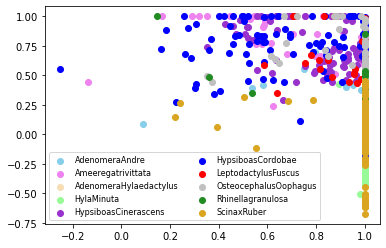

In [21]:
#scatter plot of MFCCs_1 and MFCCs_2
s1 = plt.scatter(data[0:672,0],            data[0:672,1],color='skyblue')
s2 = plt.scatter(data[672:4150,0],     data[672:4150,1],   color='violet')
s3 = plt.scatter(data[4150:4692,0],   data[4150:4692,1], color='wheat')
s4 = plt.scatter(data[4692:5002,0],   data[4692:5002,1], color='palegreen')
s5 = plt.scatter(data[5002:5474,0],   data[5002:5474,1], color='darkorchid')
s6 = plt.scatter(data[5474:6595,0],   data[5474:6595,1], color='blue')
s7 = plt.scatter(data[6595:6895,0],   data[6595:6895,1], color='red')
s8 = plt.scatter(data[6895:6979,0],   data[6895:6979,1], color='silver')
s9 = plt.scatter(data[6979:7047,0],   data[6979:7047,1], color='forestgreen')
s10 = plt.scatter(data[7047:7195,0], data[7047:7195,1], color='goldenrod')
plt.legend((s1,s2,s3,s4,s5,s6,s7,s8,s9,s10),
                   ('AdenomeraAndre', 'Ameeregatrivittata', 'AdenomeraHylaedactylus', 'HylaMinuta', 'HypsiboasCinerascens', 'HypsiboasCordobae', 'LeptodactylusFuscus', 'OsteocephalusOophagus', 'Rhinellagranulosa', 'ScinaxRuber'),
                  scatterpoints = 1,
                  ncol = 2,
                  fontsize = 8)
plt.show()

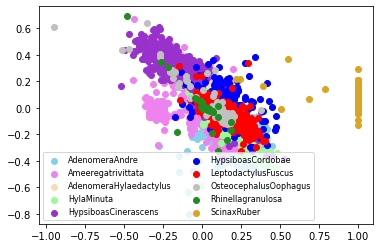

In [20]:
#scatter plot of MFCCs_10 and MFCCs_12
s1 = plt.scatter(data[0:672,9],            data[0:672,11],         color='skyblue')
s2 = plt.scatter(data[672:4150,9],     data[672:4150,11],   color='violet')
s3 = plt.scatter(data[4150:4692,9],   data[4150:4692,11], color='wheat')
s4 = plt.scatter(data[4692:5002,9],   data[4692:5002,11], color='palegreen')
s5 = plt.scatter(data[5002:5474,9],   data[5002:5474,11], color='darkorchid')
s6 = plt.scatter(data[5474:6595,9],   data[5474:6595,11], color='blue')
s7 = plt.scatter(data[6595:6895,9],   data[6595:6895,11], color='red')
s8 = plt.scatter(data[6895:6979,9],   data[6895:6979,11], color='silver')
s9 = plt.scatter(data[6979:7047,9],   data[6979:7047,11], color='forestgreen')
s10 = plt.scatter(data[7047:7195,0], data[7047:7195,11], color='goldenrod')
plt.legend((s1,s2,s3,s4,s5,s6,s7,s8,s9,s10),
                   ('AdenomeraAndre', 'Ameeregatrivittata', 'AdenomeraHylaedactylus', 'HylaMinuta', 'HypsiboasCinerascens', 'HypsiboasCordobae', 'LeptodactylusFuscus', 'OsteocephalusOophagus', 'Rhinellagranulosa', 'ScinaxRuber'),
                  scatterpoints = 1,
                  ncol = 2,
                  fontsize = 8)
plt.show()

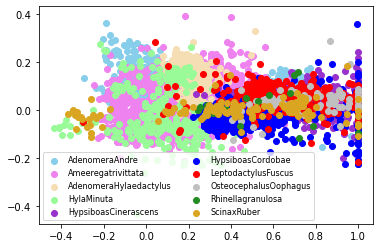

In [22]:
#scatter plot of MFCCs_3 and MFCCs_21
s1 = plt.scatter(data[0:672,2],            data[0:672,20],         color='skyblue')
s2 = plt.scatter(data[672:4150,2],     data[672:4150,20],   color='violet')
s3 = plt.scatter(data[4150:4692,2],   data[4150:4692,20], color='wheat')
s4 = plt.scatter(data[4692:5002,2],   data[4692:5002,20], color='palegreen')
s5 = plt.scatter(data[5002:5474,2],   data[5002:5474,20], color='darkorchid')
s6 = plt.scatter(data[5474:6595,2],   data[5474:6595,20], color='blue')
s7 = plt.scatter(data[6595:6895,2],   data[6595:6895,20], color='red')
s8 = plt.scatter(data[6895:6979,2],   data[6895:6979,20], color='silver')
s9 = plt.scatter(data[6979:7047,2],   data[6979:7047,20], color='forestgreen')
s10 = plt.scatter(data[7047:7195,2], data[7047:7195,20], color='goldenrod')
plt.legend((s1,s2,s3,s4,s5,s6,s7,s8,s9,s10),
                   ('AdenomeraAndre', 'Ameeregatrivittata', 'AdenomeraHylaedactylus', 'HylaMinuta', 'HypsiboasCinerascens', 'HypsiboasCordobae', 'LeptodactylusFuscus', 'OsteocephalusOophagus', 'Rhinellagranulosa', 'ScinaxRuber'),
                  scatterpoints = 1,
                  ncol = 2,
                  fontsize = 8)
plt.show()

## Feature Selection

In [48]:
#assigning the multi variables
data = data.values

In [49]:
#dividing features and target variables
features = datas[0:, 0:22]
target = data[:, -1].reshape(data.shape[0], 1)

In [50]:
# Feature Extraction with RFE
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 8)
fit = rfe.fit(features, target)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 8
Selected Features: [False False  True  True False False False  True False False False  True
  True  True False False False False False False  True  True]
Feature Ranking: [15  4  1  1  8 10  5  1 11  9  2  1  1  1  7 14  3  6 13 12  1  1]


In [51]:
#Select features with highest ranking
features_new = features[:,(15,4,1,8,10,5,11,9)]

In [52]:
#Check split data shape
print(features_new.shape)
print(target.shape)

(7195, 8)
(7195, 1)


In [53]:
#Label each species with int
#Neural network can only work with numbers
label = preprocessing.LabelEncoder() 
target= label.fit_transform(target) 

In [54]:
#spilting datasets into train datas & test datas
features_train, features_test, target_train, target_test = train_test_split(features_new, target, train_size = 0.7, random_state = 0)

In [55]:
#checking data split
print(features_train.shape)
print(features_test.shape)
print(target_train.shape)
print(target_test.shape)

(5036, 8)
(2159, 8)
(5036,)
(2159,)


## Neural Network Model

In [56]:
#Building neural network model
model = Sequential()
model.add(Dense(20, input_shape=(8,), activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [57]:
# compile the keras model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [59]:
# fit the keras model on the dataset
epoch = model.fit(features_train, target_train, validation_data=(features_test, target_test), epochs=150, batch_size=10)

Epoch 1/150
504/504 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4863 - val_loss: 0.0000e+00 - val_accuracy: 0.4766
Epoch 2/150
504/504 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4863 - val_loss: 0.0000e+00 - val_accuracy: 0.4766
Epoch 3/150
504/504 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4863 - val_loss: 0.0000e+00 - val_accuracy: 0.4766
Epoch 4/150
504/504 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4863 - val_loss: 0.0000e+00 - val_accuracy: 0.4766
Epoch 5/150
504/504 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4863 - val_loss: 0.0000e+00 - val_accuracy: 0.4766
Epoch 6/150
504/504 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4863 - val_loss: 0.0000e+00 - val_accuracy: 0.4766
Epoch 7/150
504/504 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accura

## Calculations of accuracy, recall, precision, F1-score measures & confusion matrix

In [60]:
# evaluate the model
_, train_acc = model.evaluate(features_train, target_train, verbose=0)
_, test_acc = model.evaluate(features_test, target_test, verbose=0)
print('Train accuracy: %.3f, Test accuracy: %.3f' % (train_acc, test_acc))

Train accuracy: 0.538, Test accuracy: 0.526


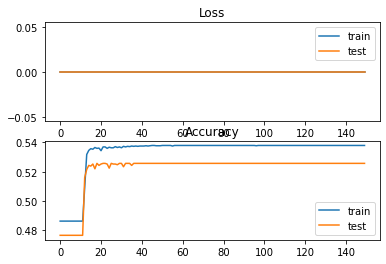

In [61]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(epoch.history['loss'], label='train')
plt.plot(epoch.history['val_loss'], label='test')
plt.legend()

# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(epoch.history['accuracy'], label='train')
plt.plot(epoch.history['val_accuracy'], label='test')
plt.legend()
plt.show()

Analysis for Neural Network:
------------------------------------
Accuracy: 0.937
Precision: 0.875
Recall: 0.855
F1 Score: 0.864


              precision    recall  f1-score   support

           0       0.90      0.92      0.91       211
           1       0.99      1.00      0.99      1029
           2       0.84      0.90      0.87       155
           3       0.68      0.59      0.63        96
           4       0.92      0.93      0.92       151
           5       0.96      0.93      0.94       335
           6       0.91      0.94      0.93        87
           7       0.76      0.68      0.72        28
           8       0.85      0.85      0.85        20
           9       0.95      0.81      0.87        47

    accuracy                           0.94      2159
   macro avg       0.88      0.85      0.86      2159
weighted avg       0.94      0.94      0.94      2159



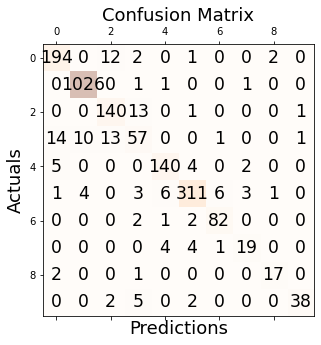

In [62]:
#accuracy, recall, precision, F1-score measures & confusion matrix
print("Analysis for Neural Network:")
print("------------------------------------")

#Create predictions
svc = SVC(kernel='linear', C=10.0, random_state=1)
svc.fit(features_train, target_train)
y_pred = svc.predict(features_test)

#Acurracy
print('Accuracy: %.3f' % accuracy_score(target_test, y_pred))
#Precision
print('Precision: %.3f' % precision_score(target_test, y_pred, average = 'macro'))
#Recall
print('Recall: %.3f' % recall_score(target_test, y_pred, average = 'macro'))
#F1-scores
print('F1 Score: %.3f' % f1_score(target_test, y_pred, average = 'macro'))

#classification report
print("\n")
print(classification_report(target_test, y_pred))

#Confusion matrix
conf_matrix = confusion_matrix(y_true=target_test, y_pred=y_pred)
# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()